# МГТУ им. Н.Э.Баумана | ИУ5 | 6 семестр | ТМО | НИРС

## Импорт библиотек

In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate


from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set(style="ticks")

## Загрузка и первичный анализ датасета

In [ ]:
df = pd.read_csv("/dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14790 entries, 0 to 14789
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        14790 non-null  int64  
 1   annual_income              14790 non-null  float64
 2   num_bank_acc               14790 non-null  int64  
 3   num_credit_card            14790 non-null  int64  
 4   interest_rate              14790 non-null  int64  
 5   delay_from_due_date        14790 non-null  int64  
 6   outstanding_debt           14790 non-null  float64
 7   credit_history_age         14790 non-null  float64
 8   installment_per_month      14790 non-null  float64
 9   monthly_balance            14790 non-null  float64
 10  payment_of_min_amount_yes  14790 non-null  bool   
 11  credit_score               14790 non-null  int64  
dtypes: bool(1), float64(5), int64(6)
memory usage: 1.3 MB


In [ ]:
df.head()

,age,annual_income,num_bank_acc,num_credit_card,interest_rate,delay_from_due_date,outstanding_debt,credit_history_age,installment_per_month,monthly_balance,payment_of_min_amount_yes,credit_score
0,23,19114.12,3,4,3,3,809.98,22.90,49.57,186.27,False,2
1,24,19114.12,3,4,3,3,809.98,22.10,49.57,361.44,False,2
2,28,34847.84,2,4,6,3,605.03,27.40,18.82,303.36,False,2
3,28,34847.84,2,4,6,3,605.03,27.50,18.82,452.30,False,2
4,55,30689.89,2,5,4,5,632.46,17.11,16.42,425.73,False,1


**Описание полей датасета**

| Поле                   | Описание                                            | Тип данных |
|------------------------|-----------------------------------------------------|------------|
| age                    | Возраст человека                                    | int64      |
| annual_income          | Годовой доход                                       | float64    |
| num_bank_acc           | Количество банковских счетов                        | int64      |
| num_credit_card        | Количество кредитных карт                           | int64      |
| interest_rate          | Процентная ставка по кредитной карте                | float64    |
| delay_from_due_date    | Количество дней просрочки по платежу                | int64      |
| outstanding_debt       | Сумма непогашенного долга                           | float64    |
| credit_history_age     | Возраст кредитной истории                           | float64    |
| payment_of_min_amount  | Указание, был ли внесён минимальный платёж         | bool       |
| installment_per_month  | Сумма ежемесячного платежа                          | float64    |
| monthly_balance        | Ежемесячный баланс                                  | float64    |
| credit_score           | Кредитный рейтинг - ЦЕЛЕВОЙ ПРИЗНАК                                  | int64      |


Решается задача **классификации**

- 0 - poor credit score
- 1 - standard credit score
- 2 - good credit score

Проверим наличие пропусков в данных:

In [ ]:
df.isnull().sum()

,0
age,0
annual_income,0
num_bank_acc,0
num_credit_card,0
interest_rate,0
delay_from_due_date,0
outstanding_debt,0
credit_history_age,0
installment_per_month,0
monthly_balance,0


- ✅ Пропуски в данных отсутствуют
- ✅ Категориальные признаки отсутствуют

## Анализ датасета

### Значения признаков

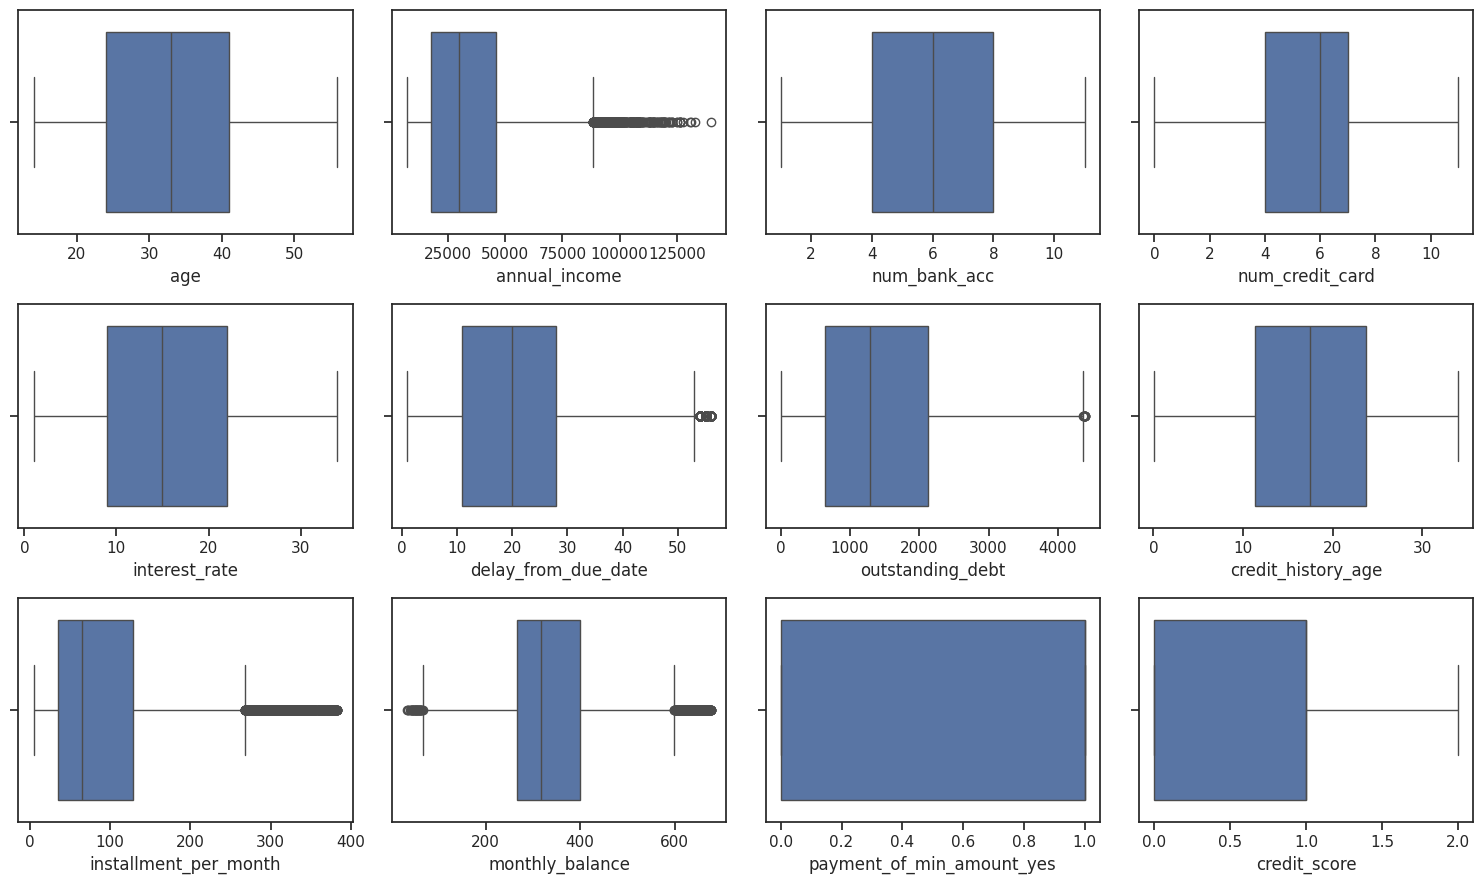

In [ ]:
n_cols = 4
n_rows = math.ceil(len(df.columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.boxplot(data=df, x=col, ax=axes[i])

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,14790.0,33.189588,10.623584,14.00,24.0000,33.00,41.0000,56.00
annual_income,14790.0,34614.790968,22381.232756,7005.93,17273.8300,29674.93,45705.0400,140014.36
num_bank_acc,14790.0,5.834212,2.311930,1.00,4.0000,6.00,8.0000,11.00
num_credit_card,14790.0,5.737931,2.060355,0.00,4.0000,6.00,7.0000,11.00
interest_rate,14790.0,15.824814,8.652381,1.00,9.0000,15.00,22.0000,34.00
delay_from_due_date,14790.0,21.697769,13.224442,1.00,11.0000,20.00,28.0000,56.00
outstanding_debt,14790.0,1470.042999,1050.582107,0.56,636.9675,1286.41,2129.3850,4385.27
credit_history_age,14790.0,17.734894,8.134064,0.10,11.3000,17.50,23.7000,34.00
installment_per_month,14790.0,93.267490,79.925232,4.46,35.0000,65.05,128.2800,383.46
monthly_balance,14790.0,342.885803,112.940651,33.56,267.1800,316.79,400.2025,677.17


### Распределение по целевому признаку

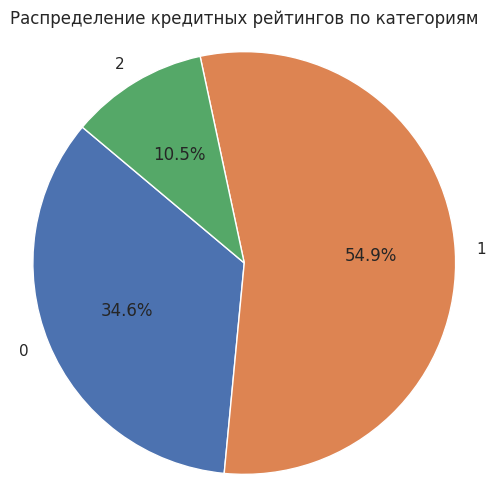

In [ ]:
score_counts = df['credit_score'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(score_counts, labels=score_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение кредитных рейтингов по категориям')
plt.axis('equal')  # Круглая форма
plt.show()

Датасет имеет неравномерное распределение данных по целевому признаку

### Корреляционная матрица

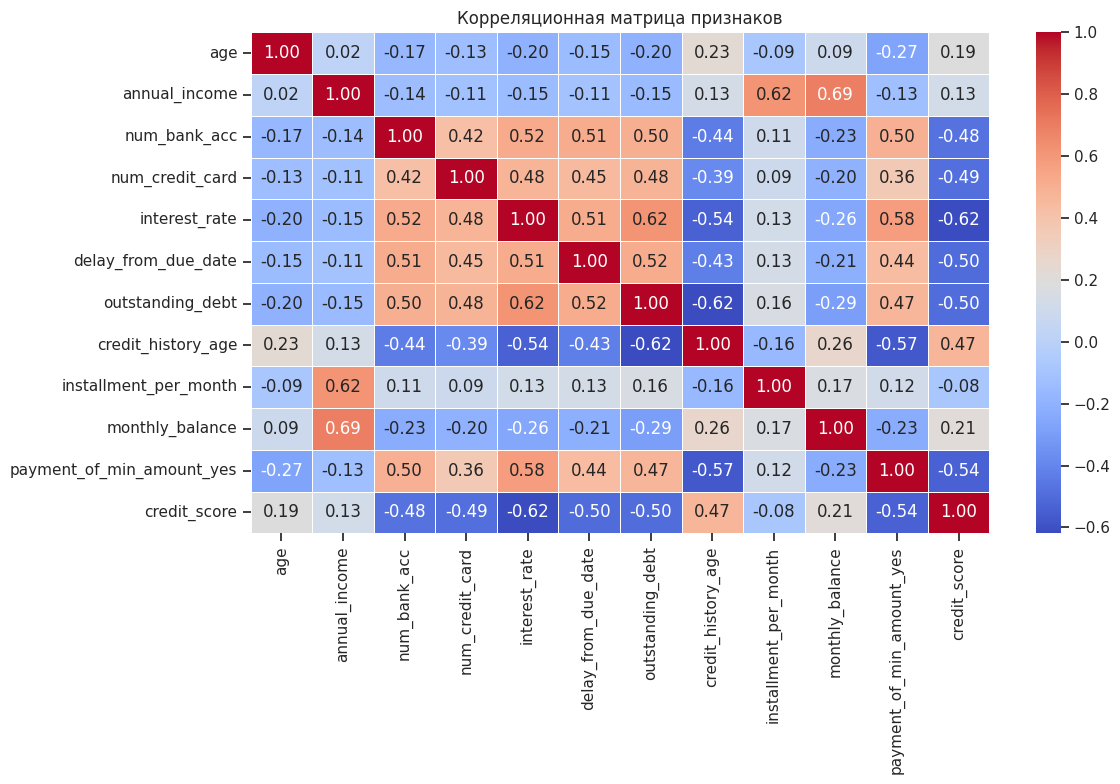

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица признаков')
plt.tight_layout()
plt.show()

- ✅ Большая часть признаков имеют сильную корреляцию с целевым признаком
- ✅ Признаки не имеют сильной корреляции между собой => датасет не содержит избыточных признаков


## Выбор метрик для оценки качества модели

### 1. Accuracy (Точность общего предсказания)

Доля правильно предсказанных примеров от общего числа


### 2. Precision

**Измеряет долю правильных положительных предсказаний среди всех предсказанных положительных классов**

### 3. Weighted F1-score

**Среднее значение F1-метрики с учётом частоты классов.**

- В отличие от Macro F1, Weighted F1 будет учитывать количество объектов в каждом классе. Чем больше примеров класса, тем больший вклад он внесёт в итоговую метрику.

- Хорошо подходит для несбалансированных данных, где важно, чтобы часто встречающиеся классы не «заглушили» редкие.

### 4. Recall

**Насколько хорошо модель находит все объекты, которые действительно принадлежат классу.**

## Выбор моделей

С учетом следующих факторов:

- Требование задания НИРС: не менее 5 моделей, не менее 2 ансамблевых моделей
- Решение задачи многоклассовой классификации
- Датасет содержит числовые признаки

выберем модели:

- Логистическая регрессия
- k-ближайших соседей
- Дерево решений
- Случайный лес
- Градиентный бустинг

## Разделение выборки

Разделим датасет на обучающую и тестовую выборки

In [ ]:
dfX = df.drop(columns=["credit_score"])
dfY = df["credit_score"]

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(
    dfX, dfY, test_size=0.2, random_state=1)

In [ ]:
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(11832, 11)
(2958, 11)
(11832,)
(2958,)


## Построение базового решения

### Логистическая регрессия

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(xTrain, yTrain)
y_pred_log_reg = log_reg.predict(xTest)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### k-ближайших соседей

In [ ]:
knn = KNeighborsClassifier()
knn.fit(xTrain, yTrain)
y_pred_knn = knn.predict(xTest)

### Дерево решений

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(xTrain, yTrain)
y_pred_tree = decision_tree.predict(xTest)

### Случайный лес

In [ ]:
random_forest = RandomForestClassifier(random_state=1)
random_forest.fit(xTrain, yTrain)
y_pred_forest = random_forest.predict(xTest)

### Градиентный бустинг

In [ ]:
gradient_boosting = GradientBoostingClassifier(random_state=1)
gradient_boosting.fit(xTrain, yTrain)
y_pred_gb = gradient_boosting.predict(xTest)

## Оценка качества моделей базового решения

In [ ]:
log_reg_accuracy = accuracy_score(yTest, y_pred_log_reg)
log_reg_precision = precision_score(yTest, y_pred_log_reg, average='weighted')
log_reg_recall = recall_score(yTest, y_pred_log_reg, average='weighted')
log_reg_f1 = f1_score(yTest, y_pred_log_reg, average='weighted')

In [ ]:
knn_accuracy = accuracy_score(yTest, y_pred_knn)
knn_precision = precision_score(yTest, y_pred_knn, average='weighted')
knn_recall = recall_score(yTest, y_pred_knn, average='weighted')
knn_f1 = f1_score(yTest, y_pred_knn, average='weighted')

In [ ]:
tree_accuracy = accuracy_score(yTest, y_pred_tree)
tree_precision = precision_score(yTest, y_pred_tree, average='weighted')
tree_recall = recall_score(yTest, y_pred_tree, average='weighted')
tree_f1 = f1_score(yTest, y_pred_tree, average='weighted')

In [ ]:
forest_accuracy = accuracy_score(yTest, y_pred_forest)
forest_precision = precision_score(yTest, y_pred_forest, average='weighted')
forest_recall = recall_score(yTest, y_pred_forest, average='weighted')
forest_f1 = f1_score(yTest, y_pred_forest, average='weighted')

In [ ]:
gb_accuracy = accuracy_score(yTest, y_pred_gb)
gb_precision = precision_score(yTest, y_pred_gb, average='weighted')
gb_recall = recall_score(yTest, y_pred_gb, average='weighted')
gb_f1 = f1_score(yTest, y_pred_gb, average='weighted')

In [ ]:
metrics = [
    ['Accuracy', log_reg_accuracy, knn_accuracy, tree_accuracy, forest_accuracy, gb_accuracy],
    ['Precision', log_reg_precision, knn_precision, tree_precision, forest_precision, gb_precision],
    ['Recall', log_reg_recall, knn_recall, tree_recall, forest_recall, gb_recall],
    ['Weighted F1-score', log_reg_f1, knn_f1, tree_f1, forest_f1, gb_f1]
]

headers = ['Метрика \ Модель', 'Логистическая регрессия', 'k-ближайших соседей', 'Дерево решений', 'Случайный лес', 'Градиентный бустинг']
print(tabulate(metrics, headers=headers, floatfmt=".4f", tablefmt="grid"))

+--------------------+---------------------------+-----------------------+------------------+-----------------+-----------------------+
| Метрика \ Модель   |   Логистическая регрессия |   k-ближайших соседей |   Дерево решений |   Случайный лес |   Градиентный бустинг |
+====================+===========================+=======================+==================+=================+=======================+
| Accuracy           |                    0.7424 |                0.7471 |           0.8878 |          0.9290 |                0.8418 |
+--------------------+---------------------------+-----------------------+------------------+-----------------+-----------------------+
| Precision          |                    0.7331 |                0.7307 |           0.8873 |          0.9290 |                0.8415 |
+--------------------+---------------------------+-----------------------+------------------+-----------------+-----------------------+
| Recall             |                    0.7424

## Подбор гиперпараметров

### Логистическая регрессия

In [ ]:
log_reg = LogisticRegression(max_iter=5000)

log_reg_param_grid = {
    'solver': ['lbfgs', 'liblinear']
}
log_reg_grid = GridSearchCV(log_reg, log_reg_param_grid, cv=5, scoring='accuracy')
log_reg_grid.fit(xTrain, yTrain)
y_pred_log_reg_tuned = log_reg_grid.best_estimator_.predict(xTest)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

### k-ближайших соседей

In [ ]:
knn = KNeighborsClassifier()

knn_param_grid = {
    'n_neighbors': [5, 3, 7, 9], # 5 — дефолт
    'weights': ['uniform', 'distance'], # uniform — дефолт
    'metric': ['minkowski', 'euclidean'], # minkowski — дефолт
}
knn_grid = GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy')
knn_grid.fit(xTrain, yTrain)
y_pred_knn_tuned = knn_grid.best_estimator_.predict(xTest)

### Дерево решений

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=1)

tree_param_grid = {
    'criterion': ['gini', 'entropy'], # gini — дефолт
    'min_samples_split': [2, 5], # 2 — дефолт
    'min_samples_leaf': [1, 2], # 1 — дефолт
}

tree_grid = GridSearchCV(
    estimator=decision_tree,
    param_grid=tree_param_grid,
    cv=5,
    scoring='accuracy'
)

tree_grid.fit(xTrain, yTrain)
y_pred_tree_tuned = tree_grid.best_estimator_.predict(xTest)

### Случайный лес

In [ ]:
random_forest = RandomForestClassifier(random_state=1)

random_forest_param_grid = {
    'n_estimators': [100, 50, 200], # 100 — дефолт
    'min_samples_split': [2, 5], # 2 — дефолт
}
random_forest_grid = GridSearchCV(random_forest, random_forest_param_grid, cv=5, scoring='accuracy')
random_forest_grid.fit(xTrain, yTrain)
y_pred_forest_tuned = random_forest_grid.best_estimator_.predict(xTest)

### Градиентный бустинг

In [ ]:
gb = GradientBoostingClassifier(random_state=1)

gb_param_grid = {
    'max_depth': [3, 7], # 3 — дефолт
}
gb_grid = GridSearchCV(gb, gb_param_grid, cv=5, scoring='accuracy')
gb_grid.fit(xTrain, yTrain)
y_pred_gb_tuned = gb_grid.best_estimator_.predict(xTest)

## Оценка качества моделей после подбора гиперпараметров

In [ ]:
log_reg_accuracy_tuned = accuracy_score(yTest, y_pred_log_reg_tuned)
log_reg_precision_tuned = precision_score(yTest, y_pred_log_reg_tuned, average='weighted')
log_reg_recall_tuned = recall_score(yTest, y_pred_log_reg_tuned, average='weighted')
log_reg_f1_tuned = f1_score(yTest, y_pred_log_reg_tuned, average='weighted')

In [ ]:
knn_accuracy_tuned = accuracy_score(yTest, y_pred_knn_tuned)
knn_precision_tuned = precision_score(yTest, y_pred_knn_tuned, average='weighted')
knn_recall_tuned = recall_score(yTest, y_pred_knn_tuned, average='weighted')
knn_f1_tuned = f1_score(yTest, y_pred_knn_tuned, average='weighted')

In [ ]:
tree_accuracy_tuned = accuracy_score(yTest, y_pred_tree_tuned)
tree_precision_tuned = precision_score(yTest, y_pred_tree_tuned, average='weighted')
tree_recall_tuned = recall_score(yTest, y_pred_tree_tuned, average='weighted')
tree_f1_tuned = f1_score(yTest, y_pred_tree_tuned, average='weighted')

In [ ]:
forest_accuracy_tuned = accuracy_score(yTest, y_pred_forest_tuned)
forest_precision_tuned = precision_score(yTest, y_pred_forest_tuned, average='weighted')
forest_recall_tuned = recall_score(yTest, y_pred_forest_tuned, average='weighted')
forest_f1_tuned = f1_score(yTest, y_pred_forest_tuned, average='weighted')

In [ ]:
gb_accuracy_tuned = accuracy_score(yTest, y_pred_gb_tuned)
gb_precision_tuned = precision_score(yTest, y_pred_gb_tuned, average='weighted')
gb_recall_tuned = recall_score(yTest, y_pred_gb_tuned, average='weighted')
gb_f1_tuned = f1_score(yTest, y_pred_gb_tuned, average='weighted')

In [ ]:
metrics = [
    ['Accuracy', log_reg_accuracy_tuned, knn_accuracy_tuned, tree_accuracy_tuned, forest_accuracy_tuned, gb_accuracy_tuned],
    ['Precision', log_reg_precision_tuned, knn_precision_tuned, tree_precision_tuned, forest_precision_tuned, gb_precision_tuned],
    ['Recall', log_reg_recall_tuned, knn_recall_tuned, tree_recall_tuned, forest_recall_tuned, gb_recall_tuned],
    ['Weighted F1-score', log_reg_f1_tuned, knn_f1_tuned, tree_f1_tuned, forest_f1_tuned, gb_f1_tuned]
]

headers = ['Метрика \ Модель', 'Логистическая регрессия', 'k-ближайших соседей', 'Дерево решений', 'Случайный лес', 'Градиентный бустинг']
print(tabulate(metrics, headers=headers, floatfmt=".4f", tablefmt="grid"))

+--------------------+---------------------------+-----------------------+------------------+-----------------+-----------------------+
| Метрика \ Модель   |   Логистическая регрессия |   k-ближайших соседей |   Дерево решений |   Случайный лес |   Градиентный бустинг |
+====================+===========================+=======================+==================+=================+=======================+
| Accuracy           |                    0.7539 |                0.8354 |           0.8891 |          0.9314 |                0.9145 |
+--------------------+---------------------------+-----------------------+------------------+-----------------+-----------------------+
| Precision          |                    0.7533 |                0.8312 |           0.8892 |          0.9314 |                0.9141 |
+--------------------+---------------------------+-----------------------+------------------+-----------------+-----------------------+
| Recall             |                    0.7539

In [ ]:
print("\nЛучшие гиперпараметры для каждой модели:")
print(f"Логистическая регрессия: {log_reg_grid.best_params_}")
print(f"k-ближайших соседей: {knn_grid.best_params_}")
print(f"Дерево решений: {tree_grid.best_params_}")
print(f"Случайный лес: {random_forest_grid.best_params_}")
print(f"Градиентный бустинг: {gb_grid.best_params_}")


Лучшие гиперпараметры для каждой модели:
Логистическая регрессия: {'solver': 'liblinear'}
k-ближайших соседей: {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
Дерево решений: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2}
Случайный лес: {'min_samples_split': 2, 'n_estimators': 200}
Градиентный бустинг: {'max_depth': 7}


## Выводы

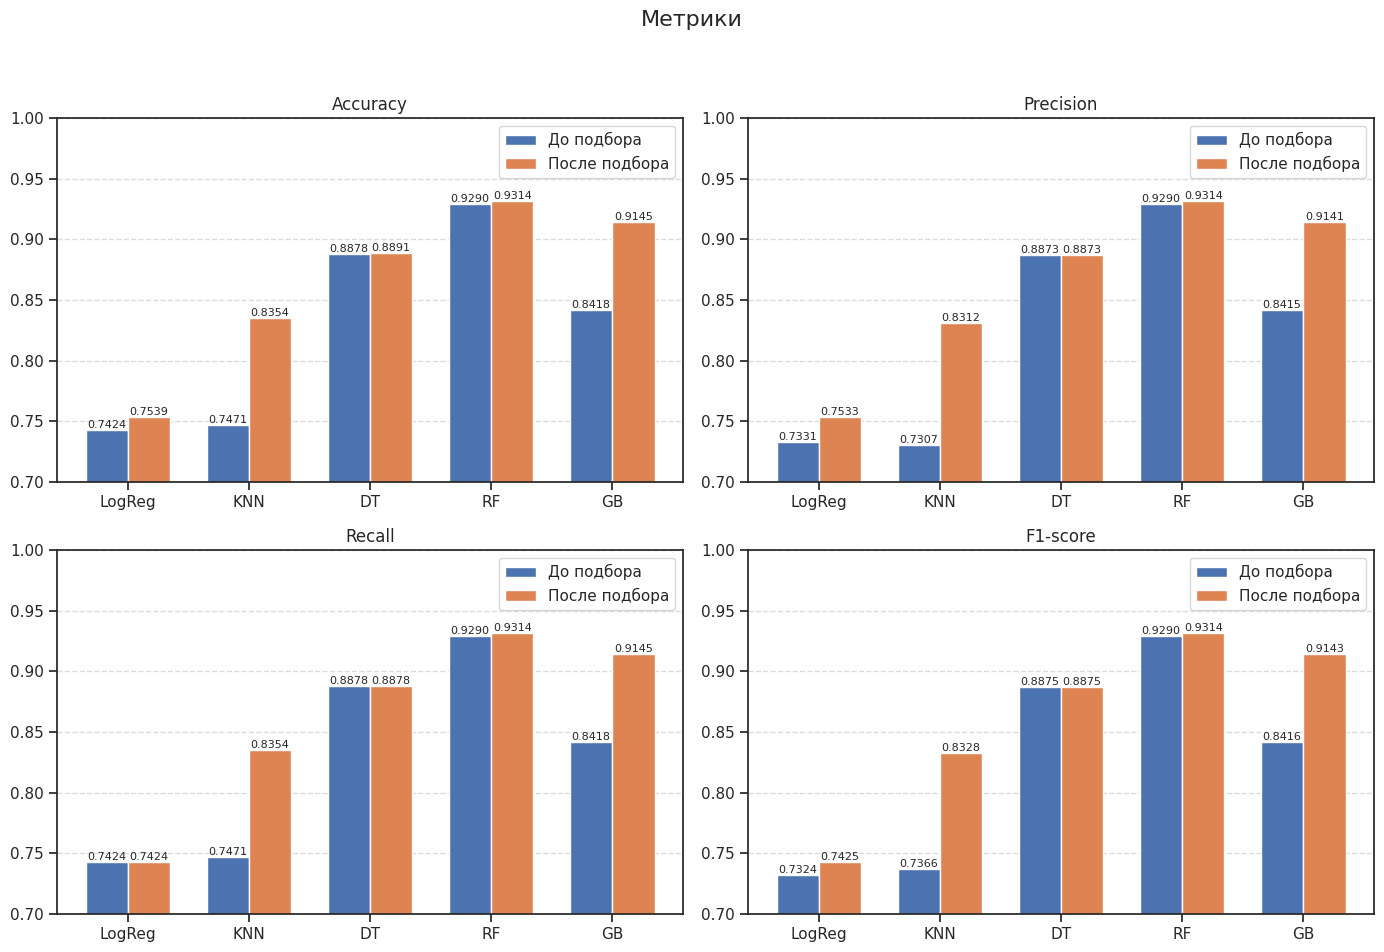

In [ ]:
before_tuning = { # [Accuracy, Precision, Recall, F1]
    'LogReg': [log_reg_accuracy, log_reg_precision, log_reg_recall, log_reg_f1],
    'KNN':     [knn_accuracy, knn_precision, knn_recall, knn_f1],
    'DT':      [tree_accuracy, tree_precision, tree_recall, tree_f1],
    'RF':      [forest_accuracy, forest_precision, forest_recall, forest_f1],
    'GB':      [gb_accuracy, gb_precision, gb_recall, gb_f1]
}

after_tuning = { # [Accuracy, Precision, Recall, F1]
    'LogReg': [log_reg_accuracy_tuned, log_reg_precision_tuned, log_reg_recall, log_reg_f1_tuned],
    'KNN':     [knn_accuracy_tuned, knn_precision_tuned, knn_recall_tuned, knn_f1_tuned],
    'DT':      [tree_accuracy_tuned, tree_precision, tree_recall, tree_f1],
    'RF':      [forest_accuracy_tuned, forest_precision_tuned, forest_recall_tuned, forest_f1_tuned],
    'GB':      [gb_accuracy_tuned, gb_precision_tuned, gb_recall_tuned, gb_f1_tuned]
}

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
models = list(before_tuning.keys())
x = np.arange(len(models))
width = 0.35

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i, metric in enumerate(metrics_names):
    before = [before_tuning[model][i] for model in models]
    after = [after_tuning[model][i] for model in models]

    bars_before = axs[i].bar(x - width/2, before, width, label='До подбора')
    bars_after = axs[i].bar(x + width/2, after, width, label='После подбора')

    for bar in bars_before:
        height = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width()/2, height, f'{height:.4f}',
                    ha='center', va='bottom', fontsize=8)

    for bar in bars_after:
        height = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width()/2, height, f'{height:.4f}',
                    ha='center', va='bottom', fontsize=8)

    axs[i].set_title(metric)
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(models)
    axs[i].set_ylim(0.7, 1.0)
    axs[i].legend()
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

fig.suptitle('Метрики', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Наибольшую точность (**93.14%**) показала модель **Случайный лес** c следующими параметрами:

- min_samples_split=2
- n_estimators=200